In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore') 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

In [2]:
dataset = pd.read_csv('diabetes.csv') 

X = dataset.iloc[:,:8].values 
Y = dataset.iloc[:, 8].values 

# Splitting the data for problems 1 and 2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)

In [3]:
# Problem 1
# Scaling the features
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test)

# Creating the logistic model and fitting it
classifier = LogisticRegression(random_state=42) 
classifier.fit(X_train, Y_train)

# Creating predictions with the test data
Y_pred = classifier.predict(X_test)

In [4]:
# Computing the metrics for the model
cnf_matrix = confusion_matrix(Y_test, Y_pred) 

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 

Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727


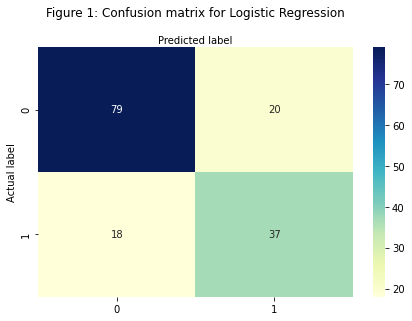

In [5]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Figure 1: Confusion matrix for Logistic Regression', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label');

In [6]:
# Problem 2
# Creating the naive bayes model and fitting it
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

# Creating predictions with the test data
Y_pred = classifier.predict(X_test) 

In [7]:
# Computing the metrics for the model
cnf_matrix = confusion_matrix(Y_test, Y_pred) 

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 

Accuracy: 0.7662337662337663
Precision: 0.6610169491525424
Recall: 0.7090909090909091


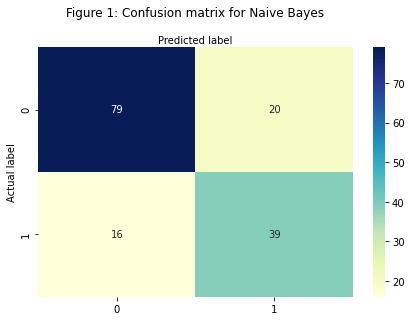

In [8]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Figure 2: Confusion matrix for Naive Bayes', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label');

In [9]:
# Problem 3
# Scaling the features
sc_X = StandardScaler() 
X = sc_X.fit_transform(X)

# Specifing the model
classifier = LogisticRegression(random_state=42)

# Computing the k-fold cross validation and specifing the metrics used
metrics = ['accuracy', 'precision', 'recall']
kf = KFold(n_splits=5, random_state=42, shuffle=True)
scores1 = cross_validate(classifier, X, Y, scoring=metrics, cv=kf, n_jobs=-1)

kf = KFold(n_splits=10, random_state=42, shuffle=True)
scores2 = cross_validate(classifier, X, Y, scoring=metrics, cv=kf, n_jobs=-1)

In [10]:
# Displaying the metrics for the model
print("Accuracy (K=5): ",scores1['test_accuracy'].mean())
print("Precision (K=5): ",scores1['test_precision'].mean())
print("Recall (K=5): ",scores1['test_recall'].mean())

print("Accuracy (K=10): ",scores2['test_accuracy'].mean())
print("Precision (K=10): ",scores2['test_precision'].mean())
print("Recall (K=10): ",scores2['test_recall'].mean())

Accuracy (K=5):  0.7695526695526695
Precision (K=5):  0.7185385878489328
Recall (K=5):  0.5761472730990309
Accuracy (K=10):  0.7746924128503077
Precision (K=10):  0.7274342105263158
Recall (K=10):  0.5791831525702494


In [11]:
# Problem 4
# Scaling the features
sc_X = StandardScaler() 
X = sc_X.fit_transform(X)

# Specifing the model
classifier = GaussianNB()

# Computing the k-fold cross validation and specifing the metrics used
metrics = ['accuracy', 'precision', 'recall']
kf = KFold(n_splits=5, random_state=42, shuffle=True)
scores1 = cross_validate(classifier, X, Y, scoring=metrics, cv=kf, n_jobs=-1)

kf = KFold(n_splits=10, random_state=42, shuffle=True)
scores2 = cross_validate(classifier, X, Y, scoring=metrics, cv=kf, n_jobs=-1)

In [12]:
# Displaying the metrics for the model
print("Accuracy (K=5): ",scores1['test_accuracy'].mean())
print("Precision (K=5): ",scores1['test_precision'].mean())
print("Recall (K=5): ",scores1['test_recall'].mean())

print("Accuracy (K=10): ",scores2['test_accuracy'].mean())
print("Precision (K=10): ",scores2['test_precision'].mean())
print("Recall (K=10): ",scores2['test_recall'].mean())

Accuracy (K=5):  0.7539258127493421
Precision (K=5):  0.6645294767870302
Recall (K=5):  0.6011292482940126
Accuracy (K=10):  0.7512303485987697
Precision (K=10):  0.6537815101446814
Recall (K=10):  0.5938748312619281
